<span style="color:blue; font-size:2em">Desease prediction</span>

1.EDA

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("cardio_train.csv", sep=";")

df['age'] = round(df['age'] / 365)

df.head()
df.shape

(70000, 13)

In [226]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,53.338686,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,6.765294,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,30.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,65.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


How many patients diagnosed with cardiovascular disease versus healthy persons?

In [227]:
cardio_positiv = df["cardio"].sum() 
cardio_negativ = len(df) - cardio_positiv 
print(f"Sick patients: {cardio_positiv}")
print(f"Healthy persons: {cardio_negativ}")

Sick patients: 34979
Healthy persons: 35021


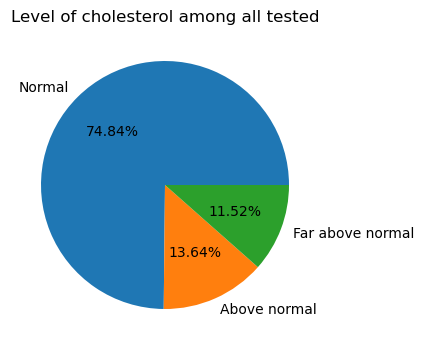

In [228]:
labels = ["Normal", "Above normal", "Far above normal"]
cholesterol = df["cholesterol"].value_counts().sort_index()
plt.figure(figsize=(4, 5))
plt.pie(cholesterol, labels=labels, autopct='%1.2f%%')
plt.title("Level of cholesterol among all tested")
plt.show()

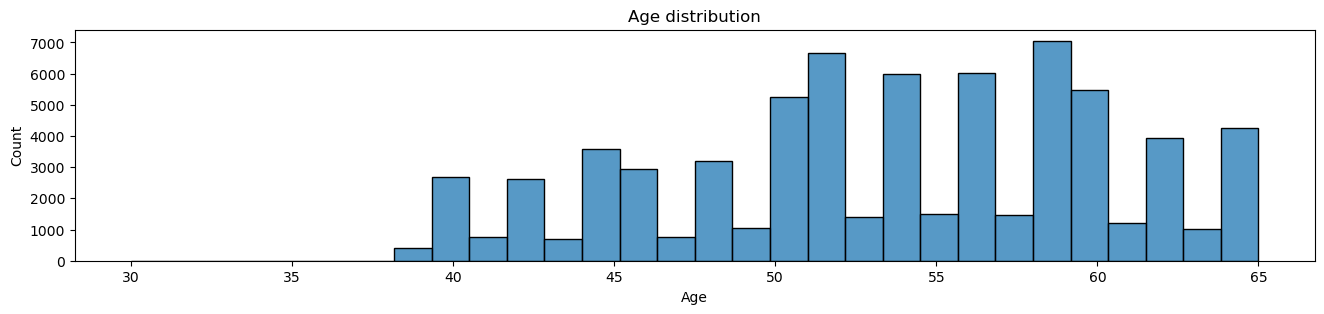

In [229]:
plt.figure(figsize=(16, 3)) 
sns.histplot(data=df, x="age", bins=30) 
plt.xlabel("Age") 
plt.ylabel("Count")
plt.title("Age distribution") 

plt.show() 

In [230]:
smokers = df[df["smoke"] == 1].shape[0] 
total = df.shape[0]
print(f"Precentage of smokers: {smokers / total:.1%}")

Precentage of smokers: 8.8%


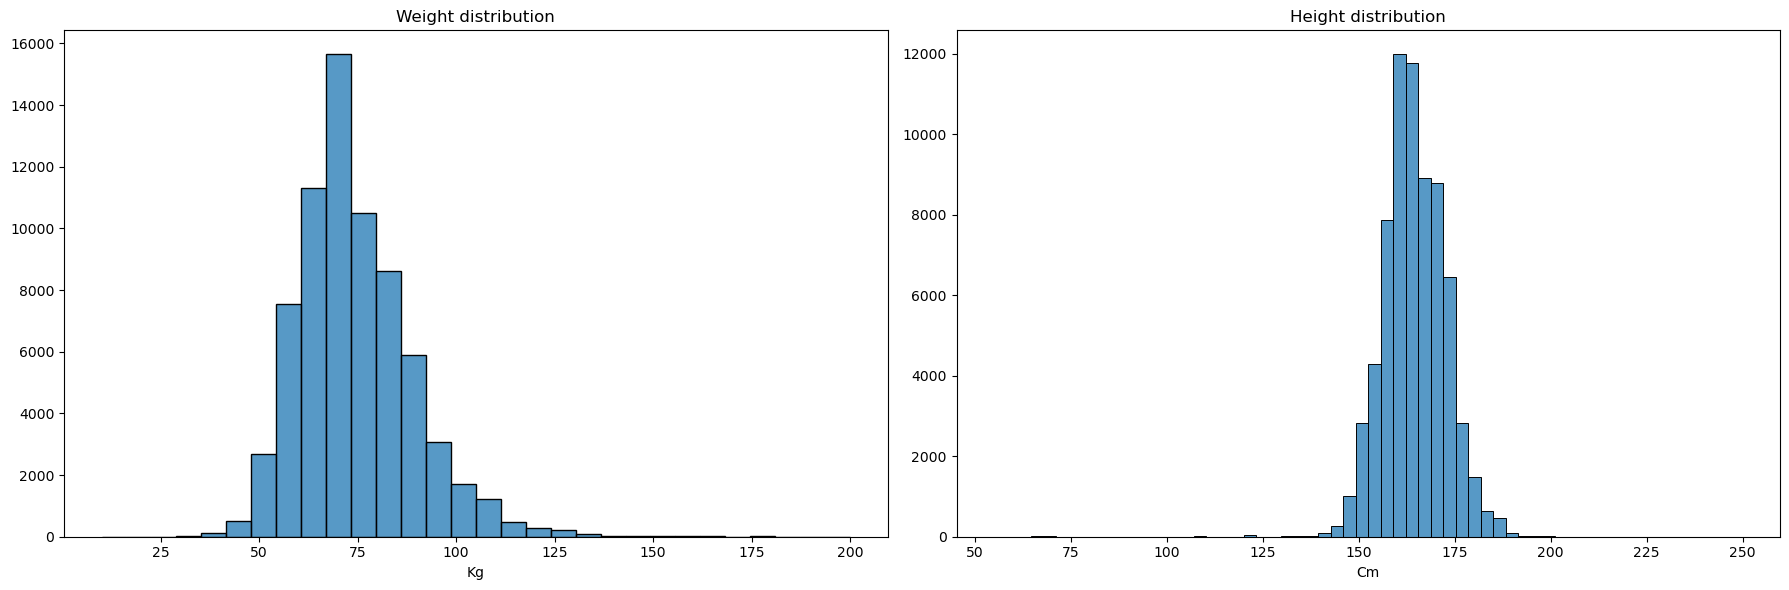

In [231]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(x=df['weight'], bins=30, ax=ax[0]).set(xlabel="Kg", ylabel=None)
ax[0].set_title('Weight distribution')

sns.histplot(x=df['height'], bins=60, ax=ax[1]).set(xlabel="Cm", ylabel=None)
ax[1].set_title('Height distribution')

plt.tight_layout()
plt.show()


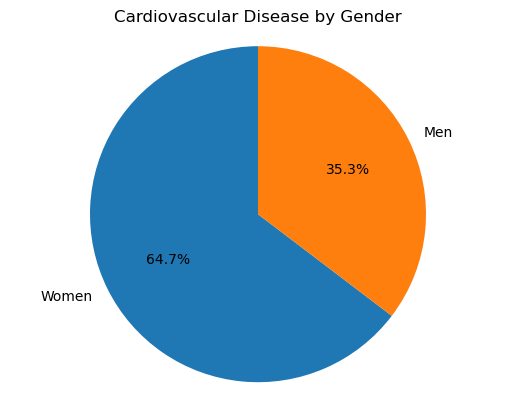

In [232]:
cardio_df = df[df['cardio'] == 1]
gender_counts = cardio_df['gender'].value_counts().sort_index()  

labels = ['Women', 'Men']

sizes = [gender_counts.get(1, 0), gender_counts.get(2, 0)] # chat gpt

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Cardiovascular Disease by Gender')
plt.axis('equal')
plt.show()

2.Feature engineering BMI

Body mass index (BMI) is a value derived from the mass (weight) and height of a person. The BMI is defined as the body mass divided by the square of the body height, and is expressed in units of kg/m2, resulting from mass in kilograms (kg) and height in metres (m) (wikipedia).

Let's create categorical BMI-feature with following categories: normal range, over-
weight, obese (class I), obese (class II), obese (class III).

According to WHO, criteria for different categories are:
Normal range	18.5–25.0	
Overweight (Pre-obese)	25.0–30.0	
Obese (Class I)	30.0–35.0	
Obese (Class II)	35.0–40.0	
Obese (Class III)	≥ 40.0	

According to https://ourworldindata.org/human-height, 95% of women are of height between 15-179, 95% of men correspondingly are 163-194 cm. Assuming that highest boundary for weight is reasonable to be 200 kg, top boundary for BMI is reasonable to be 53 kg/m2. Low boundary for outlier bmi =18.5 according to the assighnment. All other values we exclude from the analysis.



In [233]:
df['bmi'] = df['weight'] / (df['height'] / 100)**2
df = df[(df['bmi'] >=18.5) & (df['bmi'] <= 53)]
df['bmi'] = round(df['bmi'], 1) 
# Creating categorical BMI-feature and add it to the data set:

def categorize_bmi(bmi):

    if 18.5 <= bmi <= 24.9:
        return "Normal"
    elif 25 <= bmi <= 29.9:
        return "Pre-obese"
    elif 30 <= bmi <= 34.9:
        return "Obese (Class I)"
    elif 35 <= bmi <= 39.9:
        return "Obese (Class II)"
    else:
        return "Obese (Class III)"


df['bmi_cat'] = df['bmi'].apply(categorize_bmi)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9,Obese (Class I)
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5,Normal
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7,Pre-obese
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76.0,120,80,1,1,1,0,1,0,26.9,Pre-obese
69996,99995,62.0,1,158,126.0,140,90,2,2,0,0,1,1,50.5,Obese (Class III)
69997,99996,52.0,2,183,105.0,180,90,3,1,0,1,0,1,31.4,Obese (Class I)
69998,99998,61.0,1,163,72.0,135,80,1,2,0,0,0,1,27.1,Pre-obese


In [234]:
df.min(), df.max()



(id                  0
 age              30.0
 gender              1
 height             98
 weight           30.0
 ap_hi            -150
 ap_lo             -70
 cholesterol         1
 gluc                1
 smoke               0
 alco                0
 active              0
 cardio              0
 bmi              18.5
 bmi_cat        Normal
 dtype: object,
 id                 99999
 age                 65.0
 gender                 2
 height               200
 weight             180.0
 ap_hi              16020
 ap_lo              11000
 cholesterol            3
 gluc                   3
 smoke                  1
 alco                   1
 active                 1
 cardio                 1
 bmi                 53.0
 bmi_cat        Pre-obese
 dtype: object)

3. Feature engineering blood pressure

systolic (mmHg): ap_hi
diastolic (mmHg): ap_lo
Defining outliers: This is not obvious; excluding values wich are physiologically irrelevant. As can be seen from analysis above, the dataset contains negative values (min -150) and extreme high values (max 16020).
Desiding take out physiologically irrelevant values:

In [235]:
df = df[(df["ap_hi"] <220) & (df["ap_hi"] > 60) & (df["ap_lo"] <120) & (df["ap_lo"] >40)]
df.shape

(67646, 15)

Categories: 
According to https://www.healthline.com, can be categorized as follows:
systolic /diastolic :
Healthy	< 120 mmHg	AND < 80 mmHg
Elevated	120-129 mmHg AND < 80 mmHg
Stage 1 hypertension	130-139 mmHg OR 80-89 mmHg
Stage 2 hypertension	≥ 140 mmHg  OR ≥ 90 mmHg
Hypertension crisis	≥ 180 mmHg   OR ≥ 120 mmHg

In [236]:
def categorize_blood_pressure(ap_hi, ap_lo):
    if ap_hi< 120 and ap_lo < 80:
        return "Healthy"
    elif 120 <= ap_hi <= 130 and ap_lo < 80:
        return "Elevated"
    elif 130 <= ap_hi <= 139 or 80 <= ap_lo <= 89:
        return "Stage 1 Hypertension"
    elif ap_hi >= 140 or ap_lo >= 90:
        return "Stage 2 Hypertension"
    elif ap_hi > 180 or ap_lo > 120:
        return "Hypertension Crisis"
    

df['blood_pressure'] = df.apply(lambda x: categorize_blood_pressure(x['ap_hi'], x['ap_lo']), axis=1)
df.head()

/tmp/ipykernel_3780/3383250220.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['blood_pressure'] = df.apply(lambda x: categorize_blood_pressure(x['ap_hi'], x['ap_lo']), axis=1)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat,blood_pressure
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal,Stage 1 Hypertension
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9,Obese (Class I),Stage 2 Hypertension
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5,Normal,Elevated
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7,Pre-obese,Stage 2 Hypertension
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal,Healthy


4. Visualisation of ilness cases 


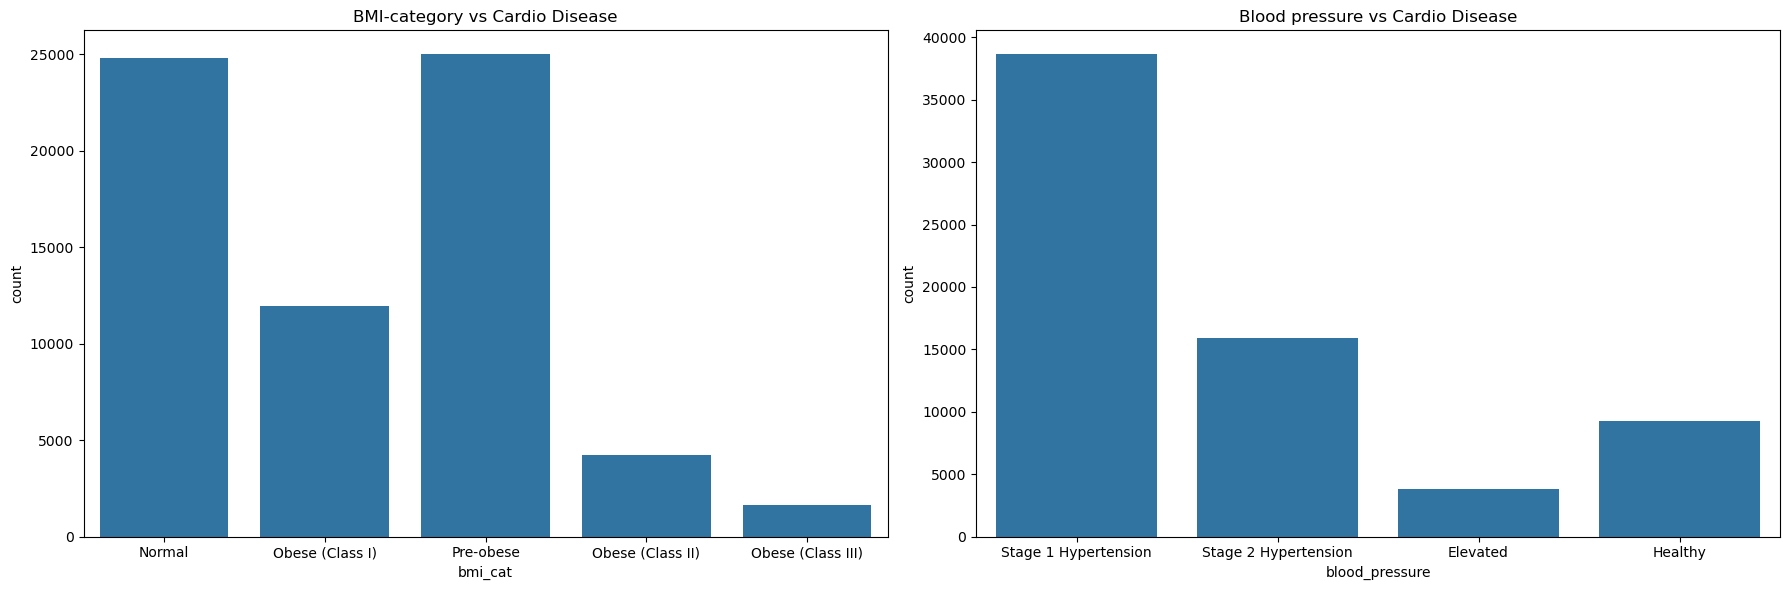

In [237]:
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.countplot(data=df, x='bmi_cat', ax=ax[0])
ax[0].set_title("BMI-category vs Cardio Disease")
sns.countplot(data=df, x='blood_pressure', ax=ax[1])
ax[1].set_title("Blood pressure vs Cardio Disease")
plt.tight_layout()
plt.show()



5. Visualisation of correlations
Converts categorical columns into one-hot encoded dummy variables
Allows us quickly explore feature relationships (positive, negative, or no correlation) in a dataset
We see strong correlation between weight and BMI, which is not surprising because higher weight leads to higher BMI.

<Axes: >

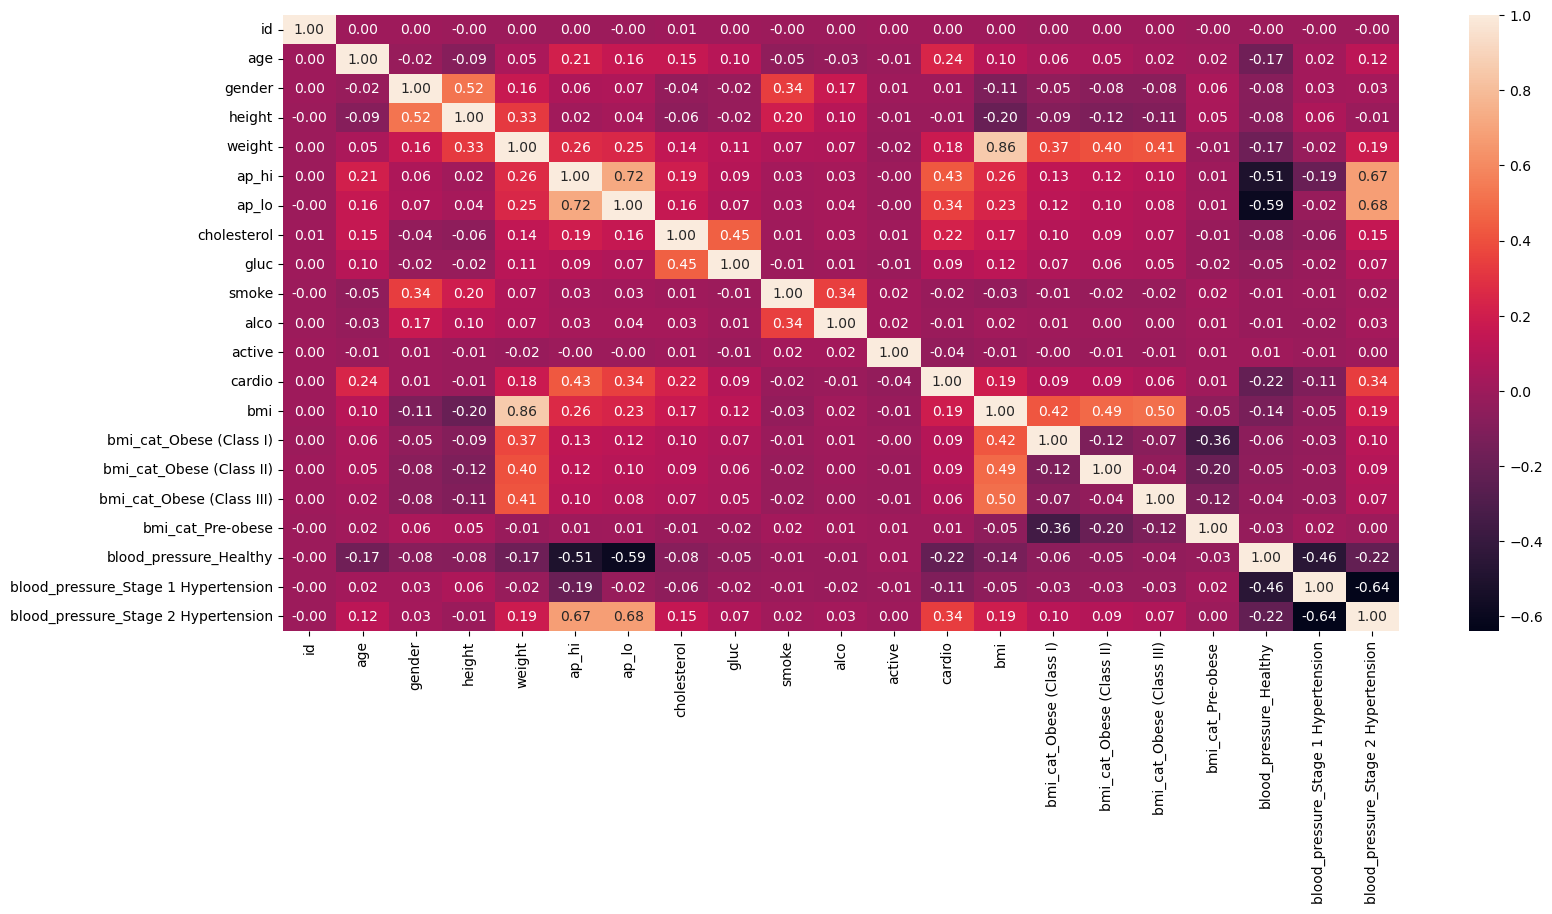

In [238]:
def plot_heat(df):
    df = pd.get_dummies(df, drop_first=True)
    plt.figure (figsize=(18,8))
    plot = sns.heatmap(df.corr(), annot=True, fmt= '.2f')
    return plot
plot_heat(df)

In [239]:
df.head ()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_cat,blood_pressure
0,0,50.0,2,168,62.0,110,80,1,1,0,0,1,0,22.0,Normal,Stage 1 Hypertension
1,1,55.0,1,156,85.0,140,90,3,1,0,0,1,1,34.9,Obese (Class I),Stage 2 Hypertension
2,2,52.0,1,165,64.0,130,70,3,1,0,0,0,1,23.5,Normal,Elevated
3,3,48.0,2,169,82.0,150,100,1,1,0,0,1,1,28.7,Pre-obese,Stage 2 Hypertension
4,4,48.0,1,156,56.0,100,60,1,1,0,0,0,0,23.0,Normal,Healthy


In [240]:
# 6. Creating two data sets:
df1 = df.copy()
df1.drop (['bmi', 'ap_hi', 'ap_lo', 'height', 'weight'], axis=1, inplace=True), 
df1 = pd.get_dummies(df1, columns=['bmi_cat', 'blood_pressure', 'gender'], drop_first=True)
df1.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,bmi_cat_Obese (Class I),bmi_cat_Obese (Class II),bmi_cat_Obese (Class III),bmi_cat_Pre-obese,blood_pressure_Healthy,blood_pressure_Stage 1 Hypertension,blood_pressure_Stage 2 Hypertension,gender_2
0,0,50.0,1,1,0,0,1,0,False,False,False,False,False,True,False,True
1,1,55.0,3,1,0,0,1,1,True,False,False,False,False,False,True,False
2,2,52.0,3,1,0,0,0,1,False,False,False,False,False,False,False,False
3,3,48.0,1,1,0,0,1,1,False,False,False,True,False,False,True,True
4,4,48.0,1,1,0,0,0,0,False,False,False,False,True,False,False,False


In [247]:
df2 = df.copy()
df2.drop(['bmi_cat', 'blood_pressure', 'height', 'weight'], axis=1, inplace=True)

df2 = pd.get_dummies(df2, columns=['gender'], drop_first=True)

df2.head()


,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,gender_2
0,0,50.0,110,80,1,1,0,0,1,0,22.0,True
1,1,55.0,140,90,3,1,0,0,1,1,34.9,False
2,2,52.0,130,70,3,1,0,0,0,1,23.5,False
3,3,48.0,150,100,1,1,0,0,1,1,28.7,True
4,4,48.0,100,60,1,1,0,0,0,0,23.0,False


7. ML models used:
Random Forest,
Logistic Regression,
K-Nearest Neighbors (KNN).

Performed train-validation-test split for each algorithm.Used GridSearchCV to optimize hyperparameters and run cross-validation. 
Model performance was evaluated based on accuracy, recall and other parameters.


Best hyperparameters: {'logistic__C': 0.01, 'logistic__max_iter': 10000, 'logistic__penalty': 'l2', 'logistic__solver': 'lbfgs'}
Cross-validation Accuracy: 0.7014910697770563
Validation Accuracy: 0.6982359318025032
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.77      0.72      5116
           1       0.73      0.62      0.67      5031

    accuracy                           0.70     10147
   macro avg       0.70      0.70      0.70     10147
weighted avg       0.70      0.70      0.70     10147



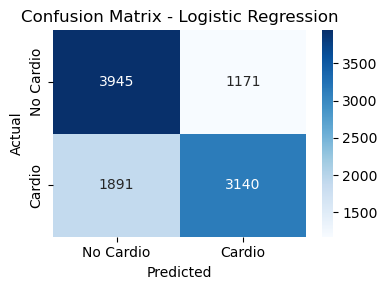

In [250]:
#####DATASET DF1, Logistic regression workflow
####
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

# two different datasets  for training, validation, and testing in a machine learning workflow.
X1 = df1.drop("cardio", axis=1)
y1 = df1["cardio"]
X2 = df2.drop("cardio", axis=1)
y2 = df2["cardio"]

#train-validation-test split usedfor training (train), hyperparameter tuning (val), and final evaluation (test)
X_train1, X_temp1, y_train1, y_temp1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_temp1, y_temp1, test_size=0.5, random_state=42)

X_train2, X_temp2, y_train2, y_temp2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_temp2, y_temp2, test_size=0.5, random_state=42)





#Pipeline definition #got help from friend/chat gpt with model validations


logistic_pipeline = Pipeline([
    ("scaler", StandardScaler()),  
    ("logistic", LogisticRegression())
])

#Hyperparameter grid
param_grid_logreg = {
'logistic__C': [0.01, 0.1, 1, 10, 100], 
'logistic__penalty': ['l2'], 
'logistic__solver': ['lbfgs', 'saga'], 
'logistic__max_iter': [10000], 
}

#gridsearch training, fit and evaluate
grid_search_logreg = GridSearchCV(logistic_pipeline, param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_logreg.fit(X_train1, y_train1)

# Best estimation
y_model_logreg = grid_search_logreg.best_estimator_

# Prediction on val data
y_pred_log_reg = y_model_logreg.predict(X_val1)

print("Best hyperparameters:", grid_search_logreg.best_params_)
print("Cross-validation Accuracy:", grid_search_logreg.best_score_)
print("Validation Accuracy:", accuracy_score(y_val1, y_pred_log_reg))
cm = confusion_matrix(y_val1, y_pred_log_reg)

report_logreg = classification_report(y_val1, y_pred_log_reg)

evaluation_scores = {
    "Accuracy": accuracy_score(y_val1, y_pred_log_reg),
    "Precision": precision_score(y_val1, y_pred_log_reg),
    "Recall": recall_score(y_val1, y_pred_log_reg),
    "Confusion Matrix": cm
}

report_logreg = classification_report(y_val1, y_pred_log_reg)
print("Classification Report:")
print(report_logreg)
# Plot confusion matrix as heatmap
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Cardio", "Cardio"], yticklabels=["No Cardio", "Cardio"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.tight_layout()
plt.show()







In [258]:
####DATASET DF2, LOGISTIC REGRESSION

#gridsearch training, fit and evaluate
grid_search_logreg2 = GridSearchCV(logistic_pipeline, param_grid_logreg, cv=5, n_jobs=-1, scoring='accuracy')
grid_search_logreg2.fit(X_train2, y_train2)

# Best estimation
y_model_logreg2 = grid_search_logreg2.best_estimator_

# Prediction on val data
y_pred_log_reg2 = y_model_logreg2.predict(X_val2)
print("Best parameters:", grid_search_logreg2.best_params_)
print("Cross-validation Accuracy:", grid_search_logreg2.best_score_)
print("Validation Accuracy:", accuracy_score(y_val2, y_pred_log_reg2))

cm = confusion_matrix(y_val2, y_pred_log_reg2)
report_logreg2 = classification_report(y_val2, y_pred_log_reg2)
evaluation_scores = {
    "Accuracy": accuracy_score(y_val2, y_pred_log_reg2),
    "Precision": precision_score(y_val2, y_pred_log_reg2),
    "Recall": recall_score(y_val2, y_pred_log_reg2),
    "Confusion Matrix": cm
}
print(evaluation_scores)
print("Classification Report:")
print(report_logreg2)

Best parameters: {'logistic__C': 0.01, 'logistic__max_iter': 10000, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}
Cross-validation Accuracy: 0.7272767410815677
Validation Accuracy: 0.7254360894845767
{'Accuracy': 0.7254360894845767, 'Precision': 0.75622004108651, 'Recall': 0.6585171934009143, 'Confusion Matrix': array([[4048, 1068],
       [1718, 3313]])}
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      5116
           1       0.76      0.66      0.70      5031

    accuracy                           0.73     10147
   macro avg       0.73      0.72      0.72     10147
weighted avg       0.73      0.73      0.72     10147



In [253]:
#####DATASET DF1, Random Forest model workflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV

random_f = Pipeline(StandardScaler()), MinMaxScaler(),
(RandomForestClassifier())

param_grid = {'max_depth': [1, 2],}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1, scoring="recall")
clf.fit(X_train1, y_train1)

y_model1 = clf.best_estimator_
y_pred1 = y_model1.predict(X_val1)

report_rf1 = classification_report(y_val1, y_pred1)

cm = confusion_matrix(y_val1, y_pred1)
report_rf1 = classification_report(y_val, y_pred1)
evaluation_scores = {
    "Accuracy": accuracy_score(y_val1, y_pred1),
    "Precision": precision_score(y_val1, y_pred1),
    "Recall": recall_score(y_val1, y_pred1),
    "Confusion Matrix": cm
}

print("Best parameters for Random Forest:", clf.best_params_)
print("Cross-validation Accuracy:", clf.best_score_)
print("Validation Accuracy:", accuracy_score(y_val1, y_pred1))
print(evaluation_scores)
print("Classification Report:")
print(report_rf1)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters for Random Forest: {'max_depth': 2}
Cross-validation Accuracy: 0.5513696750228902
Validation Accuracy: 0.6820735192667784
{'Accuracy': 0.6820735192667784, 'Precision': 0.7155481251492716, 'Recall': 0.5955078513218048, 'Confusion Matrix': array([[3925, 1191],
       [2035, 2996]])}
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.77      0.71      5116
           1       0.72      0.60      0.65      5031

    accuracy                           0.68     10147
   macro avg       0.69      0.68      0.68     10147
weighted avg       0.69      0.68      0.68     10147



In [257]:
#####DATASET DF2, Random Forest model workflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

from sklearn.model_selection import GridSearchCV


random_f = Pipeline(StandardScaler()), MinMaxScaler(),
(RandomForestClassifier())

param_grid = {'max_depth': [1, 2],}
clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=1, scoring="recall")
clf.fit(X_train2, y_train2)

y_model2 = clf.best_estimator_
y_pred2 = y_model2.predict(X_val2)


report_rf2 = classification_report(y_val2, y_pred2)
cm = confusion_matrix(y_val2, y_pred2)

evaluation_scores = {
    "Accuracy": accuracy_score(y_val2, y_pred2),
    "Precision": precision_score(y_val2, y_pred2),
    "Recall": recall_score(y_val2, y_pred2),
    "Confusion Matrix": cm
}

print("Best parameters for Random Forest:", clf.best_params_)
print("Cross-validation Accuracy:", clf.best_score_)
print(evaluation_scores)
print("Classification Report:")
print(report_rf2)


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters for Random Forest: {'max_depth': 2}
Cross-validation Accuracy: 0.6437743005984023
{'Accuracy': 0.7162708189612693, 'Precision': 0.759903381642512, 'Recall': 0.6253229974160207, 'Confusion Matrix': array([[4122,  994],
       [1885, 3146]])}
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      5116
           1       0.76      0.63      0.69      5031

    accuracy                           0.72     10147
   macro avg       0.72      0.72      0.71     10147
weighted avg       0.72      0.72      0.71     10147



In [261]:
#DATASET DF1, KNN-Neighbors workflow
from sklearn.neighbors import KNeighborsClassifier


pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())


param_grid_knn = {
    'kneighborsclassifier__n_neighbors':[5, 7, 10],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2], 
}

grid_search_knn1 = GridSearchCV(pipe_knn, param_grid_knn, cv=5, n_jobs=-1)

grid_search_knn1.fit(X_train1, y_train1)

y_model_knn1 = grid_search_knn1.best_estimator_
y_pred_knn1 = y_model_knn1.predict(X_val1)

best_params_knn1 = grid_search_knn1.best_params_

report_knn1 = classification_report(y_val1, y_pred_knn1)
cm = confusion_matrix(y_val1, y_pred1)

evaluation_scores = {
    "Accuracy": accuracy_score(y_val1, y_pred1),
    "Precision": precision_score(y_val1, y_pred1),
    "Recall": recall_score(y_val1, y_pred1),
    "Confusion Matrix": cm
}

print(f"Best Parameters: {best_params_knn1}")
print("Cross-validation Accuracy:", grid_search_knn1.best_score_)
print(evaluation_scores)
print("Classification Report:")
print(report_knn1)

Best Parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Cross-validation Accuracy: 0.6781763214936006
{'Accuracy': 0.6820735192667784, 'Precision': 0.7155481251492716, 'Recall': 0.5955078513218048, 'Confusion Matrix': array([[3925, 1191],
       [2035, 2996]])}
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.76      0.70      5116
           1       0.71      0.60      0.65      5031

    accuracy                           0.68     10147
   macro avg       0.68      0.68      0.67     10147
weighted avg       0.68      0.68      0.67     10147



In [262]:
#DATASET DF2, KNN-Neighbors workflow
from sklearn.neighbors import KNeighborsClassifier


pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())


param_grid_knn = {
    'kneighborsclassifier__n_neighbors':[5, 7, 10],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2], 
}

grid_search_knn2 = GridSearchCV(pipe_knn, param_grid_knn, cv=5, n_jobs=-1)

grid_search_knn2.fit(X_train2, y_train2)

y_model_knn2 = grid_search_knn2.best_estimator_
y_pred_knn2 = y_model_knn2.predict(X_val2)

best_params_knn2 = grid_search_knn2.best_params_

report_knn2 = classification_report(y_val2, y_pred_knn2)
cm = confusion_matrix(y_val2, y_pred2)

evaluation_scores = {
    "Accuracy": accuracy_score(y_val2, y_pred2),
    "Precision": precision_score(y_val2, y_pred2),
    "Recall": recall_score(y_val2, y_pred2),
    "Confusion Matrix": cm
}
print(f"Best Parameters: {best_params_knn2}")
print("Cross-validation Accuracy:", grid_search_knn2.best_score_)
print(evaluation_scores)
print("Classification Report:")
print(report_knn2)

Best Parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
Cross-validation Accuracy: 0.7116278704168574
{'Accuracy': 0.7162708189612693, 'Precision': 0.759903381642512, 'Recall': 0.6253229974160207, 'Confusion Matrix': array([[4122,  994],
       [1885, 3146]])}
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.78      0.73      5116
           1       0.74      0.63      0.68      5031

    accuracy                           0.71     10147
   macro avg       0.71      0.71      0.71     10147
weighted avg       0.71      0.71      0.71     10147



VOTE CLASSIFIER


Evaluation metrics for classification:

Model                        Dataset     Accuracy      Recall 
Random Forest                Dataset 1    0.68         0.60   
Random Forest                Dataset 2    0.72         0.63  
Logistic Regression          Dataset 1    0.70         0.62   
Logistic Regression          Dataset 2    0.73         0.66 
KNN                          Dataset 1    0.68         0.60
KNN                          Dataset 2    0.71         0.63


Comparing two data sets, we can observe that data set 2 gives higher values for all the tested models, that's why it is chosen for vote classification.


Parameters that were optimal in studied models are:

Best Parameters (data_set2):
best_rf = {'max_depth': 2}
best_knn= {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 1, 'kneighborsclassifier__weights': 'uniform'}
best_log= {'logistic__C': 0.01, 'logistic__max_iter': 10000, 'logistic__penalty': 'l2', 'logistic__solver': 'saga'}




In [266]:
# chat gpt suggestion
# 
from sklearn.ensemble import VotingClassifier


# Random Forest
rf = RandomForestClassifier(max_depth=2, random_state=42)

# KNN (Manhattan distance = p=1)
knn = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier(n_neighbors=10, weights='uniform', p=1)
)

# Logistic Regression
logreg = make_pipeline(
    StandardScaler(),
    LogisticRegression(C=0.01, penalty='l2', solver='saga', max_iter=10000, random_state=42)
)
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf),
        ('knn', knn),
        ('log', logreg)
    ],
    voting='hard' 
)
voting_clf.fit(X_train2, y_train2)
y_pred_vote = voting_clf.predict(X_val2)

from sklearn.metrics import classification_report, accuracy_score

print("VotingClassifier Accuracy:", accuracy_score(y_val2, y_pred_vote))
print("VotingClassifier Report:\n", classification_report(y_val2, y_pred_vote))

VotingClassifier Accuracy: 0.7248447817088794
VotingClassifier Report:
               precision    recall  f1-score   support

           0       0.70      0.80      0.75      5116
           1       0.76      0.65      0.70      5031

    accuracy                           0.72     10147
   macro avg       0.73      0.72      0.72     10147
weighted avg       0.73      0.72      0.72     10147



Thus, the accuracy and recall were improved.

Chat gpt:  " But  The outcome of the VotingClassifier is a single prediction per sample, just like any other classifier — but it's based on a consensus of the individual models."
Does it Tell You Which Model is Best?
"No, VotingClassifier does not tell you which individual model is best directly"

Conclusion: Therfefore, I would choose Linear Regression because we got best 'Recall' value and accuracy among models tested.
